<a href="https://colab.research.google.com/github/LucaAPiattelli/UNI/blob/main/PY_05_UNI_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

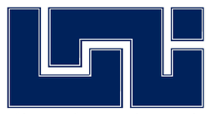

</center>

<center>
<font color="#091f60">
<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Avanzada con Power BI, R y Python

</font>
</center>

[UNI-DEPEC](https://posgrado.uni.edu.ni)

<font color="#091f60">
<h1><b>
Agrupación - Clustering

</font>

### Instalar librerías necesarias

In [ ]:
pip install pycaret[full]

     |████████████████████████████████| 266 kB 8.8 MB/s 
     |████████████████████████████████| 261 kB 48.7 MB/s 
     |████████████████████████████████| 111 kB 29.1 MB/s 
     |████████████████████████████████| 1.7 MB 37.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 55.7 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 271 kB 50.0 MB/s 
     |████████████████████████████████| 14.6 MB 123 kB/s 
     |████████████████████████████████| 2.0 MB 34.6 MB/s 
     |████████████████████████████████| 6.8 MB 54.3 MB/s 
     |████████████████████████████████| 1.3 MB 30.2 MB/s 
     |████████████████████████████████| 131 kB 59.1 MB/s 
     |████████████████████████████████| 356 kB 48.8 MB/s 
     |██████████████████

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.clustering import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Extracción de datos

In [ ]:
a = np.random.multivariate_normal([5,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,30], [[3,1],[1,4]], size = [50,])
c = np.random.multivariate_normal([50,55],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,90],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
array = np.concatenate((a,b,c,d,e),)
data = pd.DataFrame(array, columns = ["var1", "var2"])

In [ ]:
data.head()

,var1,var2
0,8.090886,3.834446
1,2.024529,-1.226258
2,7.607777,2.287405
3,5.926578,-1.512353
4,4.867125,1.434983


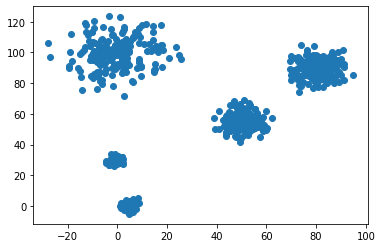

In [ ]:
plt.scatter(data["var1"], data["var2"])
plt.show()

# Configurando entorno Pycaret

La función setup() inicializa el entorno en PyCaret y prepara los datos para el modelo seleccionado y la implementación de ese modelo. La función setup() debe ser llamada antes de ejecutar cualquier función de PyCaret. 

Se necesita un parámetro obligatorios: 
- Un marco de datos de Pandas 

Todos los demás parámetros son opcionales y se utilizan para personalizar el preprocesamiento de los datos.

Cuando se ejecuta setup(), el algoritmo de inferencia de PyCaret determina automáticamente los tipos de datos para todas las funciones en función de determinadas propiedades. 

El tipo de datos debe inferirse correctamente, pero no siempre es así. Para tener en cuenta esto, PyCaret muestra una tabla que contiene las características y sus tipos de datos inferidos después de que se ejecuta setup(). 

Si todos los tipos de datos están identificados correctamente, se debe presionar enter para continuar o se puede ingresar salir para finalizar la experiencia. Asegurarse de que los tipos de datos sean correctos es  fundamental, ya que se realiza automáticamente algunas tareas de preprocesamiento que son imperativas para cualquier experimento de aprendizaje automático. 

Estas tareas se realizan de forma diferente para cada tipo de datos, por lo que es muy importante que estén configuradas correctamente.

In [ ]:
modelo = setup(data, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(750, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(750, 2)"
9,CPU Jobs,-1


Una vez que la configuración se ha ejecutado con éxito, se muestra un cuadro de información que contiene elementos importantes. La mayor parte de la información está relacionada con el preprocesamiento que se construye cuando se ejecuta setup (). 

# Creación del Modelo

Todos los modelos que podemos utilizar son:

In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


## Algoritmo K-means

Creamos el modelo con el comando create_model(), el único parámetro obligatorio es el nombre del modelo

In [ ]:
km = create_model('kmeans', num_clusters=5)
print(km)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7994,5347.5448,0.2373,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


Ahora que hemos creado un modelo, nos gustaría asignar las etiquetas de grupo a nuestro conjunto de datos (train) para analizar los resultados. Lo lograremos usando la función assign_model(). 

In [ ]:
km_resultados = assign_model(km)
km_resultados.head()

,var1,var2,Cluster
0,8.090886,3.834446,Cluster 2
1,2.024529,-1.226258,Cluster 2
2,7.607777,2.287405,Cluster 2
3,5.926578,-1.512353,Cluster 2
4,4.867125,1.434983,Cluster 2


In [ ]:
km_resultados.shape

(750, 3)

# Visualización del modelo

La función plot_model() se puede utilizar para analizar diferentes aspectos del 
modelo de agrupamiento. Esta función toma un objeto de modelo entrenado y devuelve un gráfico.

## Visualización de los clusters

In [ ]:
plot_model(km, "cluster")

## Visualización del Codo

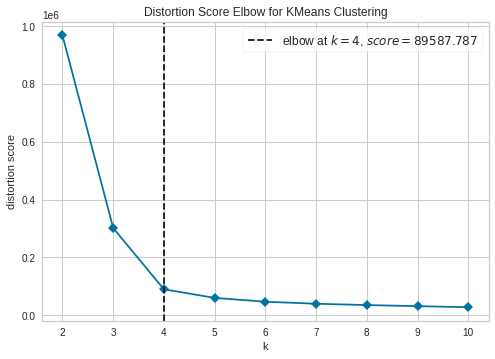

In [ ]:
plot_model(km, plot = 'elbow')

## Visualización de la Silueta

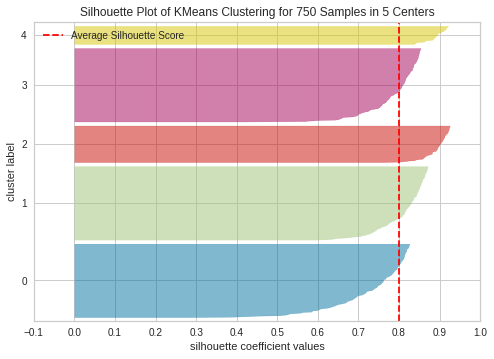

In [ ]:
plot_model(km, plot = 'silhouette')

## Visualización de la Distribución

La gráfica de distribución muestra el tamaño de cada grupo. Al pasar el cursor sobre las barras, verá el número de muestras asignadas a cada grupo

In [ ]:
plot_model(km, plot = 'distribution')

![UNI](https://posgrado.uni.edu.ni/wp-content/uploads/2017/02/logo_opt-2.png)